In [1]:
import pyspark
from pyspark.sql import SparkSession
from operator import add
from pyspark import SparkConf
spark_session = SparkSession\
        .builder\
        .master("spark://192.168.2.6:7077") \
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.shuffle.service.enabled", False)\
        .config("spark.dynamicAllocation.executorIdleTimeout","300s")\
        .config("spark.executor.cores",3)\
        .config("spark.driver.port",9998)\
        .config("spark.blockManager.port",10005)\
        .appName("Group2")\
        .getOrCreate()
sc = spark_session.sparkContext
spark = SparkSession(sc)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/24 18:58:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/03/24 18:58:52 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
22/03/24 18:58:53 WARN Utils: Service 'sparkDriver' could not bind on port 9998. Attempting port 9999.
22/03/24 18:58:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/03/24 18:58:56 WARN Utils: Service 'org.apache.spark.network.netty.NettyBlockTransferService' could not bind on port 10005. Attempting port 10006.
22/03/24 18:58:57 WARN ExecutorAllocationManager: Dynamic allocation without a shuffle service is 

In [ ]:
reddit_data = spark.read.json("hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2010-01")
#print(reddit_data.count())
#reddit_data2 = reddit_data
#reddit_data.extend([reddit_data2 , reddit_data2])
#print(reddit_data.count())

22/03/24 18:59:49 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
22/03/24 19:00:04 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


In [7]:
reddit_data.select("controversiality").distinct().collect()

[Row(controversiality=0), Row(controversiality=1)]

In [3]:
from pyspark.sql import functions as F 
import time

In [4]:
start = time.time()

reddit_data_2 = reddit_data.
end = 

SyntaxError: invalid syntax (575644799.py, line 3)

In [ ]:
reddit_data.take(5)

[Row(archived=True, author='David_ungerer', author_flair_css_class=None, author_flair_text=None, body='Good rant, stop looking for a mass movement, if one appears fine, but first change yourself.\nWhile at 54 still a work in process, I am a vegetarian (see corporate tainted food ect.) I shop at farmers markets, small shops and co-ops (member owned) I live in a urban space for two of 900 sq ft. I ride a bike and take MTA. I bank at a Federal Credit Union (small, local, member owned. Most importantly, I choose to live simply.\nAs example . . . Go to a corporate drug store (the checkout girl has no health or retirement  and has to stock shelves and sweep floors for minimum wage or less if the corporation could, and is concerned abouting chatting about the community becouse of the boss.) or ride a mile to an owner run drug store (she welcome me by name, asks about my family and work or the community. She provides health and retirement for her workers.)\nEvery day and every doller I spend I

In [5]:
import time 
start = time.time()
sub_count_mr = reddit_data.rdd \
    .map(lambda comment: (comment['subreddit'], 1)) \
    .reduceByKey(lambda accum, n: accum + n) \
    .collect()

end = time.time()


In [6]:
print(start)
print(end)
print(end-start)
print(len(sub_count_mr))
print(sorted(sub_count_mr, key=lambda sub_cnt: sub_cnt[1], reverse=True)[0:20])
#29.373241662979126
#28.87182331085205

1648050267.4901493
1648050299.1016145
31.611465215682983
2313
[('AskReddit', 623825), ('reddit.com', 300476), ('pics', 198009), ('politics', 146922), ('IAmA', 135360), ('WTF', 114836), ('gaming', 113877), ('funny', 80320), ('atheism', 71549), ('science', 70028), ('programming', 66474), ('worldnews', 65451), ('technology', 49710), ('DoesAnybodyElse', 37237), ('Music', 26250), ('relationship_advice', 23163), ('fffffffuuuuuuuuuuuu', 20700), ('Economics', 19635), ('videos', 18558), ('trees', 18314)]


In [5]:
import string
import time
start = time.time()
def screamer_sub_mapper(comment):
    n_upper = len(list(filter(lambda c: c in string.ascii_uppercase, comment['body'])))
    n_alpha = len(list(filter(lambda c: c in string.ascii_letters, comment['body'])))
    return (comment['subreddit'], (n_upper, n_alpha))

def screamer_reducer(value_list):
    total_upper = 0
    total_alpha = 0
    for value in value_list:
        (n_upper, n_alpha) = value
        total_upper += n_upper
        total_alpha += n_alpha
    screamer_score = total_upper / total_alpha if total_alpha else 0
    return (screamer_score, len(value_list))
    
screamer_subs = reddit_data.rdd \
    .map(screamer_sub_mapper) \
    .groupByKey() \
    .mapValues(screamer_reducer) 
screamer_subs.take(3)
screamer_subs.cache()
screamer_subs.filter(lambda sub_rval: sub_rval[1][1] > 1000).sortBy(lambda sub_rval: sub_rval[1][0], False).take(3)
end = time.time()
print(start)
print(end)
print(end-start)

1648105637.2191813
1648105711.3603356
74.1411542892456


In [7]:
screamer_subs.take(10)

[('Guitar', (0.03993063672258514, 2365)),
 ('gaming', (0.04634333183681584, 113877)),
 ('tf2', (0.04218364388611033, 11055)),
 ('UFOs', (0.040925455315544264, 109)),
 ('Android', (0.03985353395489092, 5072)),
 ('relationship_advice', (0.0258588414246725, 23163)),
 ('Libertarian', (0.027112888076615646, 13375)),
 ('gamereviews', (0.03755293637430481, 77)),
 ('polyamory', (0.028991778450887063, 62)),
 ('happy', (0.0581092300472873, 1291))]

In [8]:
#one core
one = 74.00914692878723
#two cores
two = 70.34418892860413
#three cores
three = 70.31279945373535
#four cores
four = 69.78004670143127

Text(0, 0.5, 'Y axis label')

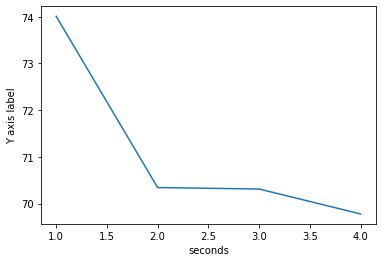

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
x = [1,2,3,4]
y = [one,two,three,four]

plt.plot(x,y)

plt.xlabel("seconds")
plt.ylabel("Y axis label")

In [1]:
import string
import time
def screamer_sub_mapper(comment):
    n_upper = len(list(filter(lambda c: c in string.ascii_uppercase, comment['body'])))
    n_alpha = len(list(filter(lambda c: c in string.ascii_letters, comment['body'])))
    return (comment['subreddit'], (n_upper, n_alpha))

def screamer_reducer(value_list):
    total_upper = 0
    total_alpha = 0
    for value in value_list:
        (n_upper, n_alpha) = value
        total_upper += n_upper
        total_alpha += n_alpha
    screamer_score = total_upper / total_alpha if total_alpha else 0
    return (screamer_score, len(value_list))

def test(numCores,url):
    import pyspark
    from pyspark.sql import SparkSession
    from operator import add
    from pyspark import SparkConf
    start = time.time()
    spark_session = SparkSession\
        .builder\
        .master("spark://192.168.2.6:7077") \
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.shuffle.service.enabled", False)\
        .config("spark.dynamicAllocation.executorIdleTimeout","300s")\
        .config("spark.executor.cores",1)\
        .config("spark.cores.max", numCores)\
        .config("spark.driver.port",9998)\
        .config("spark.blockManager.port",10005)\
        .appName("Group2")\
        .getOrCreate()
    sc = spark_session.sparkContext
    spark = SparkSession(sc)
    reddit_data = spark.read.json(url)
    screamer_subs = reddit_data.rdd \
    .map(screamer_sub_mapper) \
    .groupByKey() \
    .mapValues(screamer_reducer) \

    screamer_subs.cache()
    screamer_subs.filter(lambda sub_rval: sub_rval[1][1] > 1000).sortBy(lambda sub_rval: sub_rval[1][0], False).take(3)
    end = time.time()
    spark.stop()
    t = end-start
    return t

In [2]:
t5 = test(4,"hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2020-01-18")

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/23 17:58:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/03/23 17:58:18 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
22/03/23 17:58:20 WARN ExecutorAllocationManager: Dynamic allocation without a shuffle service is an experimental feature.
22/03/23 17:59:08 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [3]:
t5

217.9006223678589

In [4]:
t4 = test(3,"hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2010-01")

22/03/23 18:01:55 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
22/03/23 18:01:55 WARN ExecutorAllocationManager: Dynamic allocation without a shuffle service is an experimental feature.


In [5]:
t4

118.06924057006836

In [6]:
t3 = test(2,"hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2010-02")

22/03/23 18:03:54 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
22/03/23 18:03:54 WARN ExecutorAllocationManager: Dynamic allocation without a shuffle service is an experimental feature.


In [7]:
t3

127.4151840209961

In [8]:
t2 = test(1,"hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2005-12")

22/03/23 18:06:02 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
22/03/23 18:06:02 WARN ExecutorAllocationManager: Dynamic allocation without a shuffle service is an experimental feature.


In [9]:
t2

12.93213152885437

In [ ]:
reddit_5 = spark.read.json("hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2020-01-18")
reddit_2 = spark.read.json("hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2007-07")
reddit_3 = spark.read.json("hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2010-02")
reddit_4 = spark.read.json("hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2010-01")
reddit_1 = spark.read.json("hdfs://192.168.2.6:9000/user/ubuntu/input/RC_2005-12")

In [2]:
#one core
t2 = 260
t3 = 246
t4 = 245
t5 = 245
one = t2
#two cores
two = t3
#three cores
three = t4
#four cores
four = t5

<Figure size 432x288 with 0 Axes>

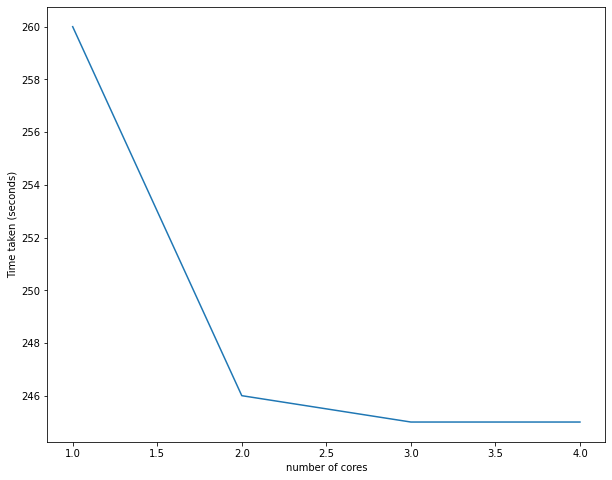

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
x = [1,2,3,4]
y = [one,two,three,four]
plt.figure(figsize=(10, 8))
plt.plot(x,y)

plt.xlabel("number of cores")
plt.ylabel("Time taken (seconds)")
plt.savefig("strong_scaling.png")